In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('./monthly-milk-production.csv', delimiter=';', parse_dates=['month'], dayfirst=True, index_col='month')
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


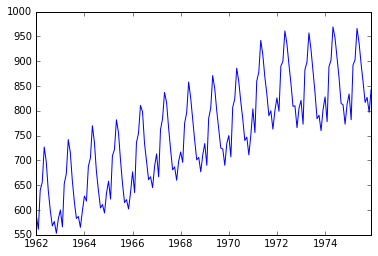

In [22]:
plt.plot(data.milk)

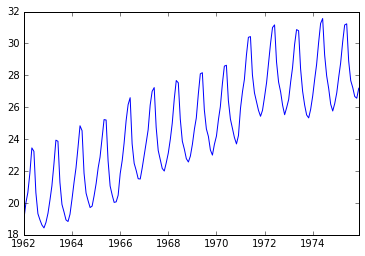

In [28]:
from calendar import monthrange
data.daily = data.milk / data.index.days_in_month
plt.plot(data.daily)

## Задание 7

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [25]:
data.daily_diff1 = data.daily - data.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

In [27]:
data.daily_diff12 = data.daily - data.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [38]:
import statsmodels.api as sm
print(np.round(sm.tsa.stattools.adfuller(data.milk)[1], 2))
print(np.round(sm.tsa.stattools.adfuller(data.daily_diff1.dropna())[1], 2)) # ВОТ ЭТО
print(np.round(sm.tsa.stattools.adfuller(data.daily_diff12.dropna())[1], 2))

0.63
0.06
0.22


# Задание 8

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

Ответ Q = 4

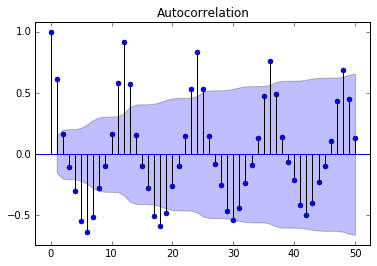

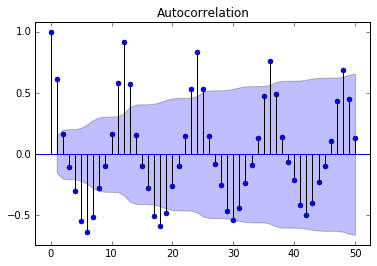

In [42]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data.daily_diff1.dropna().values.squeeze(), lags=50)

# Задание 9

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

Ответ p=10


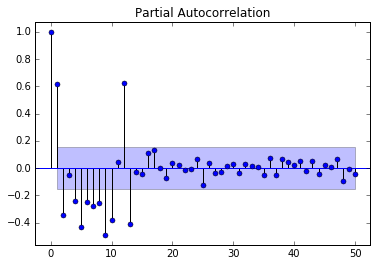

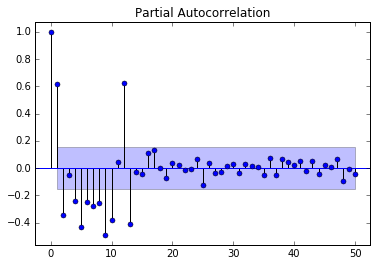

In [43]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data.daily_diff1.dropna().values.squeeze(), lags=50)